## 랜덤 데이터 생성

Text(0, 0.5, 'y')

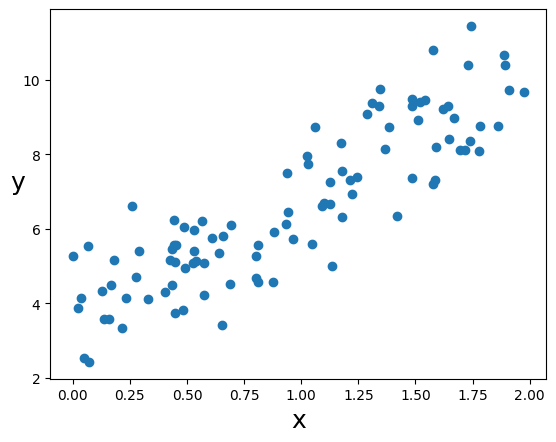

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

plt.scatter(X,y)
plt.xlabel("x", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)

In [5]:
W = np.random.randn(1)
b = np.random.randn(1)
print(W, b)

[-0.0132867] [1.0214041]


Text(0, 0.5, 'y')

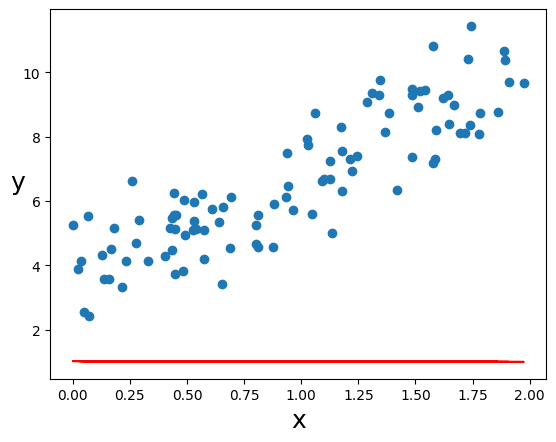

In [6]:
y_pred = W * X + b
plt.plot(X,y_pred,'r')
plt.scatter(X,y)
plt.xlabel("x", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)

In [7]:
def MSE(y, y_pred):
    m = len(y)
    cost = (1/m) * np.sum(np.square(y_pred-y))
    
    return cost
    
print(MSE(y, y_pred))

35.73332491290998


In [8]:
y_preds = []
epsilon = 0.03
learning_rate = 0.01

for epoch in range(1000):
    # 예측값 계산
    y_pred = W * X + b
    y_preds.append(y_pred)
    # MSE 계산
    mse = np.mean((y_pred - y)**2)
    
    if mse < epsilon:
        print("Reached MSE below 0.03")
        break
    
    # w와 b 업데이트
    w_gradient = (2/len(X)) * np.dot(X.T, (y_pred - y)).sum()
    b_gradient = (2/len(X)) * np.sum(y_pred - y)
    W -= learning_rate * w_gradient
    b -= learning_rate * b_gradient

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}, MSE: {mse:.4f}')

print(f'Final Parameters: w={W[0]:.4f}, b={b[0]:.4f}')

Epoch: 0, MSE: 35.7333
Epoch: 100, MSE: 1.0429
Epoch: 200, MSE: 1.0316
Epoch: 300, MSE: 1.0297
Epoch: 400, MSE: 1.0287
Epoch: 500, MSE: 1.0282
Epoch: 600, MSE: 1.0279
Epoch: 700, MSE: 1.0277
Epoch: 800, MSE: 1.0276
Epoch: 900, MSE: 1.0276
Final Parameters: w=3.2406, b=3.5417


In [9]:
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

W = np.random.randn(1)
b = np.random.randn(1)

print(W, b)

y_pred = W * X + b

print(X.T.shape, (y_pred - y).shape)

np.dot(X.T, (y_pred - y)), np.dot(X.T, (y_pred - y)).sum()

[-1.07442327] [0.01063386]
(1, 100) (100, 1)


(array([[-933.52651429]]), -933.5265142936365)

Text(0, 0.5, 'y')

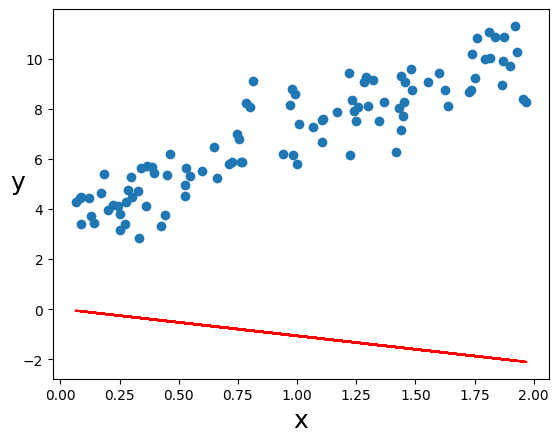

In [10]:
y_pred = W * X + b
plt.plot(X,y_pred,'r-')
plt.scatter(X,y)
plt.xlabel("x", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
# plt.grid()
# _ =plt.axis([0,2,0,15])

Initial Function  >>>  y=[-1.77157936]x+[0.31002004]
Epoch: 0, MSE: 80.3092
Epoch: 100, MSE: 0.9337
Epoch: 200, MSE: 0.8931
Epoch: 300, MSE: 0.8788
Epoch: 400, MSE: 0.8713
Epoch: 500, MSE: 0.8675
Epoch: 600, MSE: 0.8654
Epoch: 700, MSE: 0.8644
Epoch: 800, MSE: 0.8638
Epoch: 900, MSE: 0.8635
Final Parameters: w=3.3697, b=3.6883


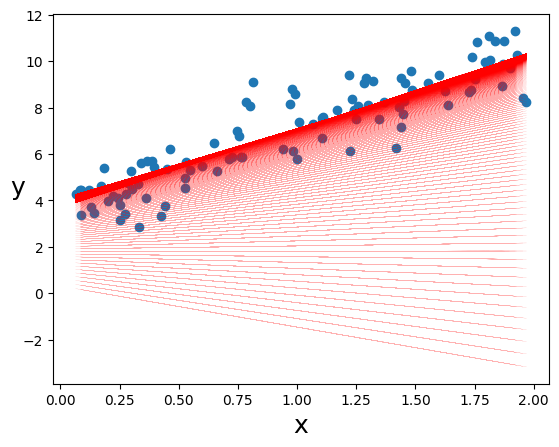

In [13]:
def gradient_descent(epochs, epsilon, learning_rate):
    y_preds = []
    W = np.random.randn(1)
    b = np.random.randn(1)
    print(f"Initial Function  >>>  y={W}x+{b}")
    for epoch in range(epochs):
        # 예측값 계산
        y_pred = W * X + b
        y_preds.append(y_pred)
        # MSE 계산
        mse = np.mean((y_pred - y)**2)
        
        if mse < epsilon:
            print("Reached MSE below 0.03")
            break
        
        # w와 b 업데이트
        w_gradient = (2/len(X)) * np.dot(X.T, (y_pred - y)).sum()
        b_gradient = (2/len(X)) * np.sum(y_pred - y)
        W -= learning_rate * w_gradient
        b -= learning_rate * b_gradient

        if epoch % 100 == 0:
            print(f'Epoch: {epoch}, MSE: {mse:.4f}')

    print(f'Final Parameters: w={W[0]:.4f}, b={b[0]:.4f}')
    
    return y_preds

y_preds = gradient_descent(1000, 0.3, 0.01)

plt.figure()
plt.scatter(X, y)
for index, y_pred in enumerate(y_preds):
    plt.plot(X, y_pred, 'r-', alpha = 0.3 + (0.7/len(y_preds))*index, linewidth=0.1)
plt.xlabel("x", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.show()

In [35]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error


# 데이터 생성 (임의의 선형 데이터)
np.random.seed(42)
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

# SGDRegressor 모델 생성 및 학습
sgd_reg = SGDRegressor(max_iter=1000, tol=0.001, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

# 예측 및 성능 평가
y_train_pred = sgd_reg.predict(X)

train_mse = mean_squared_error(y, y_train_pred)

# 모델 파라미터 출력
print(f"가중치: {sgd_reg.coef_}")
print(f"절편: {sgd_reg.intercept_}")
print(f"훈련 세트 MSE: {train_mse}")

가중치: [2.8250878]
절편: [4.24365286]
훈련 세트 MSE: 0.8140841871689319
